<a href="https://colab.research.google.com/github/Ndioua/Banking77chatbot/blob/main/ELKASMI_CIND820_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Environment Set-up

import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

## **I - Data Preparation**

In [ ]:
pip install --upgrade datasets

ERROR: Operation cancelled by user


KeyboardInterrupt: 

In [ ]:
from datasets import load_dataset # loading dataset from Hugging face

# 1. Load the full Banking77 dataset (train and test) from Hugging Face
dataset = load_dataset("banking77")

# 2. Extract label names for intent mapping
label_names = dataset['train'].features['label'].names

# 3. Convert to DataFrames and map label numbers to intent names
df_train = pd.DataFrame(dataset['train'])
df_train['intent_name'] = df_train['label'].apply(lambda x: label_names[x])

df_test = pd.DataFrame(dataset['test'])
df_test['intent_name'] = df_test['label'].apply(lambda x: label_names[x])

# 4. Combine both train and test sets into a single DataFrame
Banking77 = pd.concat([df_train, df_test], ignore_index=True)

# 5. Save the combined dataset with human-readable intent labels
Banking77.to_csv("Banking77.csv", index=False)

# Display the first few rows of the dataset
print("Combined Banking77 dataset saved as 'Banking77.csv'")
print("\n", Banking77.head())

In [ ]:
# Count the number of samples per intent (label)
class_distribution = Banking77['label'].value_counts()
print("\nClass Distribution (Counts):\n", class_distribution)

# Calculate percentage distribution of each intent class
class_percentages = Banking77['label'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):\n", class_percentages)

# Visualize the distribution of classes
plt.figure(figsize=(12, 6))

# Horizontal bar plot showing the number of samples per class
sns.countplot(data=Banking77, y= 'label', order=class_distribution.index)
plt.title('Class Distribution in Banking77 Dataset')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(f"Total classes: {len(class_distribution)}")
print(f"Most common class: {class_distribution.idxmax()} ({class_distribution.max()} samples)")
print(f"Least common class: {class_distribution.idxmin()} ({class_distribution.min()} samples)")


In [ ]:
# Identify the 20 most frequent intent classes by label index
top_20_classes = Banking77['label'].value_counts().nlargest(20).index

# Filter the dataset to only include these top 20 intent classes
Banking20 = Banking77[Banking77['label'].isin(top_20_classes)].copy()

# Visualize the distribution of the top 20 classes
plt.figure(figsize=(12, 6))
sns.countplot(data=Banking20, y='label', order=top_20_classes, palette="viridis")
plt.title('Figure 3: Top 20 Most Frequent Classes Distribution in Banking77')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

# Print dataset size and retention percentage
print(f"\nOriginal dataset size: {len(Banking77)}")
print(f"Filtered dataset size: {len(Banking20)}")
print(f"Percentage of data retained: {len(Banking20)/len(Banking77)*100:.1f}%")

In [ ]:
# Display the first 20 rows of the Banking20 dataset
print(tabulate(Banking20.head(10), headers='keys', tablefmt='pretty'))

In [ ]:
# Importing text pre-processing libraries

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

In [ ]:
# Define the preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower() # Lower case the capital letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english')) # Remove stop words (like "the", "is", "and", etc.)
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer() # Lemmatize each token
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the first column (text) in the DataFrame
text = Banking20.columns[0]
Banking20['processed_text'] = Banking20[text].apply(preprocess_text)

# Verify results
print("Before/After Preprocessing Examples:")
for i in range(3):  # Show first 3 samples
    print(f"\nOriginal: {Banking20[text].iloc[i]}")
    print(f"Processed: {Banking20['processed_text'].iloc[i]}")

## **II - Can automatically generated sentiment features improve intent classification performance on the Banking77 dataset?**

In [ ]:
!pip install transformers
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import random

In [ ]:
# Randomly select 200 observations from the Banking20 dataset
Banking20Sample = Banking20.sample(n=200, random_state=42).reset_index(drop=True)

print(Banking20Sample.head())

# Print dataset size and retention percentage
print(f"\nOriginal dataset size: {len(Banking20)}")
print(f"Filtered dataset size: {len(Banking20Sample)}")
print(f"Percentage of data retained: {len(Banking20Sample)/len(Banking20)*100:.1f}%")


                                                text  label  \
0  Could you please check one of my transfer whic...      5   
1  My ATM transaction shorted me on cash, and I t...     76   
2                 I got less money than I asked for.     75   
3  I want a refund because my package has been ta...     52   
4  My refund for a purchase hasn't  cone through ...     51   

                               intent_name  \
0  balance_not_updated_after_bank_transfer   
1  wrong_exchange_rate_for_cash_withdrawal   
2            wrong_amount_of_cash_received   
3                           request_refund   
4                    Refund_not_showing_up   

                                      processed_text  
0  could please check one transfer made hour ago ...  
1  atm transaction shorted cash think exchange ra...  
2                               got less money asked  
3          want refund package taking long arrive go  
4                     refund purchase hasnt cone yet  

Original data

In [ ]:
# Use the raw URL from GitHub
url = "https://raw.githubusercontent.com/Ndioua/Banking77chatbot/f07e9b12f0b14866e8b615c3a1107e5b63d62038/Banking20SampleManual.xlsx"

# Read Excel file directly from GitHub
Banking20SampleManual = pd.read_excel(url)

# Rename the 'Sentiment' column to 'ManualSentiment' for clarity
Banking20SampleManual.rename(columns={'Sentiment': 'ManualSentiment'}, inplace=True)

# Display the first few rows
print(Banking20SampleManual.head())

                                                text  label  \
0  Could you please check one of my transfer whic...      5   
1  My ATM transaction shorted me on cash, and I t...     76   
2                 I got less money than I asked for.     75   
3  I want a refund because my package has been ta...     52   
4  My refund for a purchase hasn't  cone through ...     51   

                               intent_name ManualSentiment  
0  balance_not_updated_after_bank_transfer        negative  
1  wrong_exchange_rate_for_cash_withdrawal        negative  
2            wrong_amount_of_cash_received        negative  
3                           request_refund        negative  
4                    Refund_not_showing_up        negative  


In [ ]:
# Merge by 'text' column to the original Banking20Sample
Banking20Sample = pd.merge(
    Banking20Sample,
    Banking20SampleManual[['text', 'ManualSentiment']],
    on='text',
    how='left'
)

In [ ]:
# Split the dataset into 80% train and 20% Test
train_df, test_df = train_test_split(
    Banking20Sample,
    test_size=0.2,
    random_state=42,
    # Preserve class distribution
    stratify=Banking20Sample["label"]
)

In [ ]:
# Sentiment Inference Function using FinBERT

# Initialize FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Sentiment Function
def get_sentiment(text, max_length=512):
    """
    Returns the sentiment prediction for a single input text.
    Output labels are 'negative', 'neutral', or 'positive'.
    """
    try:
        # Tokenize the input text with truncation and padding for batch compatibility
        inputs = tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            max_length=max_length,
            padding=True
        )

        # Forward pass through the model without gradient computation
        with torch.no_grad():
            outputs = model(**inputs)

        # Get probabilities
        probs = softmax(outputs.logits, dim=1)
        sentiment_idx = torch.argmax(probs).item()
        return ["negative", "neutral", "positive"][sentiment_idx]

    except Exception as e:
      # Print error and return neutral as fallback
        print(f"Error processing text: {str(e)}")
        return "neutral"

# Apply the sentiment inference function on the preprocessed text column of the sample dataset (train and test separately)

train_df['FinBERTSentiment'] = train_df['processed_text'].apply(get_sentiment)
test_df['FinBERTSentiment'] = test_df['processed_text'].apply(get_sentiment)




config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
print (test_df.head(20))

                                                  text  label  \
25   I'd like to get a refund for something I bough...     52   
129  I sent a cheque to you a few days ago and the ...      6   
87   I did not receive the correct amount for the e...     17   
198                    I see an unauthorized withdraw.     20   
179  Can I get money in my home currency at some AT...     76   
82   I have been overcharged. I just changed over R...     17   
32   A withdraw I tried to make at the ATM was decl...     26   
176  I don't know why the deposit I made a week ago...      6   
18   There was an extra fee when I paid with my car...     15   
184  I think I was charged a different exchange rat...     76   
125              My payment had a wrong exchange rate.     17   
197  I think there's a purchase at a store that I d...     16   
86   Can you tell me what this fee is on my statement?     34   
36   I exchanged cash when traveling and the rate w...     76   
9        I have been char

In [ ]:
''' In the context of customer service chatbot queries, the majority of interactions tend to be driven by issues or complaints, which naturally generate a predominantly negative sentiment. Positive or neutral sentiments occur less frequently.
This results in a class imbalance problem when using three separate sentiment categories (positive, neutral, negative), as the 'negative' class dominates the dataset.

To address this imbalance and improve model performance, we merge 'positive' and 'neutral' sentiments into a single 'non-negative' category. This simplification better reflects the practical situation where the chatbot mostly handles problematic or negative interactions, and treats other sentiments as one combined category.

This binary sentiment grouping ('non-negative' vs. 'negative') helps balance the dataset and reduces noise from distinctions that are less relevant for detecting issues or negative experiences in customer queries.'''

# Map FinBERT Sentiment
train_df['FinBERTSentiment'] = train_df['FinBERTSentiment'].replace({
    'positive': 'non-negative',
    'neutral': 'non-negative'
})

test_df['FinBERTSentiment'] = test_df['FinBERTSentiment'].replace({
    'positive': 'non-negative',
    'neutral': 'non-negative'
})

# Map Manual Sentiment
train_df['ManualSentiment'] = train_df['ManualSentiment'].replace({
    'positive': 'non-negative',
    'neutral': 'non-negative'
})

test_df['ManualSentiment'] = test_df['ManualSentiment'].replace({
    'positive': 'non-negative',
    'neutral': 'non-negative'
})

✅ Accuracy: 0.88


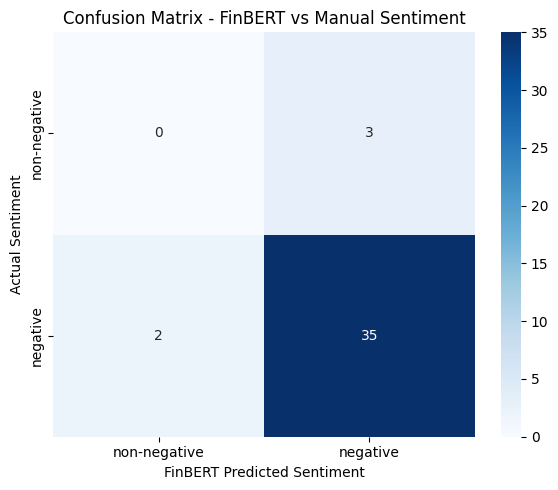


📊 Classification Report:
              precision    recall  f1-score   support

non-negative       0.00      0.00      0.00         3
    negative       0.92      0.95      0.93        37

    accuracy                           0.88        40
   macro avg       0.46      0.47      0.47        40
weighted avg       0.85      0.88      0.86        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Drop rows with missing sentiment in test set only
test_df = test_df.dropna(subset=['FinBERTSentiment', 'ManualSentiment'])

# Set evaluation labels
y_true = test_df['ManualSentiment'].astype(str)
y_pred = test_df['FinBERTSentiment'].astype(str)

# Convert sentiment columns to strings to avoid type mismatch issues during evaluation
y_true = test_df['ManualSentiment'].astype(str)
y_pred = test_df['FinBERTSentiment'].astype(str)

# Calculate accuracy score: proportion of correctly predicted sentiments
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['non-negative', 'negative'])
labels = ['non-negative', 'negative']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - FinBERT vs Manual Sentiment")
plt.xlabel("FinBERT Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, labels=['non-negative', 'negative']))


In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping


texts = Banking20['processed_text'].tolist()
labels = Banking20['label'].tolist()

# Encode labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# # Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

# # Load DistilBERT tokenizer and model from Hugging Face
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')
# Freeze the BERT model so its weights aren't updated during training to speeds up training while still using rich pre-trained embeddings
bert_model.trainable = False

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Some weights of the PyTorch model were not used when initializing the TF 2.

In [ ]:
# Function to tokenize input texts into BERT format (IDs + attention masks)
def tokenize_texts(texts):
    encodings = tokenizer(
        texts,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='tf'
    )
    return encodings

# Toknize after split
train_encodings = tokenize_texts(X_train)
test_encodings = tokenize_texts(X_test)

In [ ]:
def distilbert_encode(inputs):
    input_ids, attention_mask = inputs
    outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
    return tf.reduce_mean(outputs.last_hidden_state, axis=1)  # mean pooling

# Wrap in Lambda with output_shape specified
pooled_output = tf.keras.layers.Lambda(
    distilbert_encode,
    output_shape=(768,)
)([input_ids, attention_mask])


In [ ]:
# Simple Dense classifier
x = tf.keras.layers.Dense(128, activation='relu')(pooled_output)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(x)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

In [ ]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train with tf.data.Dataset batching
batch_size = 16

train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    y_train
)).shuffle(1000).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']},
    y_test
)).batch(batch_size)

In [ ]:
# Set up early stopping due to resources constraints
# The model is going to stop training if the validation loss does not improve for 2 consecutive epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train model
print("Training DistilBERT Model (text only)...")
model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=5,
    callbacks=[early_stopping]
)

Training DistilBERT Model (text only)...
Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1077s 5s/step - accuracy: 0.0502 - loss: 3.0324 - val_accuracy: 0.0595 - val_loss: 2.9681
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 974s 5s/step - accuracy: 0.0880 - loss: 2.9512 - val_accuracy: 0.1522 - val_loss: 2.8948
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1030s 5s/step - accuracy: 0.1324 - loss: 2.8881 - val_accuracy: 0.2438 - val_loss: 2.8234
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1026s 5s/step - accuracy: 0.1797 - loss: 2.8158 - val_accuracy: 0.3270 - val_loss: 2.7527
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1021s 5s/step - accuracy: 0.2528 - loss: 2.7457 - val_accuracy: 0.3757 - val_loss: 2.6813


In [ ]:
history_more = model.fit(
    train_dataset,
    validation_data=test_dataset,  defined
    initial_epoch=5, # start from where we left off
    epochs=10, # go up to epoch 10
    callbacks=[early_stopping]
)


Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1139s 5s/step - accuracy: 0.2874 - loss: 2.6766 - val_accuracy: 0.4269 - val_loss: 2.6037
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1040s 5s/step - accuracy: 0.3307 - loss: 2.5934 - val_accuracy: 0.4614 - val_loss: 2.5292
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1036s 5s/step - accuracy: 0.3614 - loss: 2.5422 - val_accuracy: 0.4946 - val_loss: 2.4572
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1085s 5s/step - accuracy: 0.4023 - loss: 2.4594 - val_accuracy: 0.5232 - val_loss: 2.3850
Epoch 10/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1094s 5s/step - accuracy: 0.4249 - loss: 2.3798 - val_accuracy: 0.5505 - val_loss: 2.3148


In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = TFAutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

labels = ['negative', 'neutral', 'positive']

def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return None
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    probs = tf.nn.softmax(outputs.logits, axis=1).numpy()[0]

    negative_prob = probs[0]
    neutral_prob = probs[1]
    positive_prob = probs[2]

    # If neutral probability is highest but close to negative, prefer negative
    if neutral_prob > negative_prob and neutral_prob > positive_prob:
        if neutral_prob - negative_prob < 0.15:
            return 'negative'
        else:
            return 'neutral'
    else:
        # Return the class with highest prob if not neutral
        return labels[np.argmax(probs)]

tf_model.h5:   0%|          | 0.00/439M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at yiyanghkust/finbert-tone.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
Banking20['sentiment'] = Banking20['text'].apply(get_sentiment)

In [ ]:
print (Banking20.head())

                                                  text  label  \
404  Last Saturday, I was charged extra for the exc...     17   
405  Hi, I am disappointed to see such a bad exchan...     17   
406  I think the currency exchange that's been appl...     17   
407  The exchange rate I was charged for a purchase...     17   
408  Can you please explain why the exchange rate f...     17   

                          intent_name  \
404  card_payment_wrong_exchange_rate   
405  card_payment_wrong_exchange_rate   
406  card_payment_wrong_exchange_rate   
407  card_payment_wrong_exchange_rate   
408  card_payment_wrong_exchange_rate   

                                        processed_text sentiment  
404  last saturday charged extra exchange rate paym...   neutral  
405  hi disappointed see bad exchange rate hope ass...   neutral  
406        think currency exchange thats applied wrong   neutral  
407               exchange rate charged purchase right   neutral  
408     please explain exch

In [ ]:
from transformers import pipeline

# Load FinBERT sentiment analysis pipeline
finbert = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")

# Sentiment prediction function
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return None  # Skip empty or non-string entries
    try:
        result = finbert(text)
        return result[0]['label'].lower()  # 'positive', 'neutral', or 'negative'
    except Exception as e:
        print(f"Error processing text: {e}")
        return None


Device set to use cpu


In [ ]:
# Convert sentiment to binary: 'negative' stays, others become 'non-negative'
Banking20['sentiment'] = Banking20['sentiment'].apply(
    lambda x: 'Negative' if x == 'negative' else 'non-negative'
)


In [ ]:
print(Banking20.head())

                                                  text  label  \
404  Last Saturday, I was charged extra for the exc...     17   
405  Hi, I am disappointed to see such a bad exchan...     17   
406  I think the currency exchange that's been appl...     17   
407  The exchange rate I was charged for a purchase...     17   
408  Can you please explain why the exchange rate f...     17   

                          intent_name  \
404  card_payment_wrong_exchange_rate   
405  card_payment_wrong_exchange_rate   
406  card_payment_wrong_exchange_rate   
407  card_payment_wrong_exchange_rate   
408  card_payment_wrong_exchange_rate   

                                        processed_text sentiment  
404  last saturday charged extra exchange rate paym...  Negative  
405  hi disappointed see bad exchange rate hope ass...  Negative  
406        think currency exchange thats applied wrong  Negative  
407               exchange rate charged purchase right  Negative  
408     please explain exch

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    Banking20['text'], Banking20['label'], test_size=0.2, random_state=42, stratify=Banking20['label']
)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_tfidf)
print("Classification using Text Only:")
print(classification_report(y_test, y_pred))


Classification using Text Only:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           5       0.87      0.93      0.90        42
           6       0.98      0.98      0.98        44
          15       0.85      0.87      0.86        46
          16       0.83      0.93      0.88        42
          17       0.88      0.88      0.88        41
          19       0.95      0.91      0.93        43
          20       0.93      0.93      0.93        40
          26       0.86      0.98      0.91        43
          28       0.98      0.89      0.93        45
          34       0.90      0.88      0.89        41
          45       0.95      0.97      0.96        40
          51       1.00      0.97      0.99        40
          52       1.00      1.00      1.00        42
          53       0.92      0.88      0.90        40
          63       0.95      0.98      0.97        43
          64       0.92      0.81      0.86      

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack, csr_matrix

# Convert sentiment to binary: 1 = negative, 0 = non-negative
Banking20['sentiment'] = Banking20['sentiment'].apply(lambda x: 1 if x == 'negative' else 0)

# Split all three columns — text, label, sentiment
X_text = Banking20['text']
y = Banking20['label']
X_sentiment = Banking20['sentiment']

X_train_text, X_test_text, y_train, y_test, X_train_sentiment, X_test_sentiment = train_test_split(
    X_text, y, X_sentiment, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Convert sentiment to sparse matrices
sentiment_train_sparse = csr_matrix(X_train_sentiment.values.reshape(-1, 1))
sentiment_test_sparse = csr_matrix(X_test_sentiment.values.reshape(-1, 1))

# Combine TF-IDF with sentiment
X_train_combined = hstack([X_train_tfidf, sentiment_train_sparse])
X_test_combined = hstack([X_test_tfidf, sentiment_test_sparse])

# Fit Logistic Regression
clf_combined = LogisticRegression(max_iter=1000)
clf_combined.fit(X_train_combined, y_train)

# Predict and Evaluate
y_pred_combined = clf_combined.predict(X_test_combined)
print("Classification using Text + Sentiment:")
print(classification_report(y_test, y_pred_combined))


Classification using Text + Sentiment:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           5       0.87      0.93      0.90        42
           6       0.98      0.98      0.98        44
          15       0.85      0.89      0.87        46
          16       0.83      0.93      0.88        42
          17       0.92      0.88      0.90        41
          19       0.95      0.88      0.92        43
          20       0.95      0.93      0.94        40
          26       0.84      0.98      0.90        43
          28       0.98      0.89      0.93        45
          34       0.88      0.88      0.88        41
          45       0.95      0.97      0.96        40
          51       1.00      0.95      0.97        40
          52       0.98      1.00      0.99        42
          53       0.92      0.88      0.90        40
          63       0.95      0.98      0.97        43
          64       0.92      0.81      0.8

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assume X_train_combined is your training features (TF-IDF + sentiment),
# and y_train are the labels (intent classes)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_combined, y_train)

# Train the model on the balanced data:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


<Figure size 1000x800 with 0 Axes>

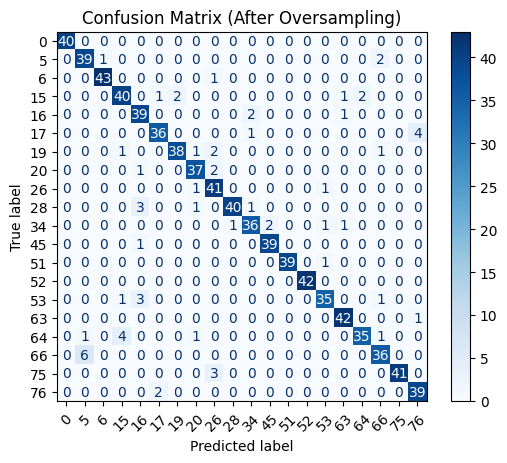

In [ ]:
# Predict on the original (non-oversampled) test data
y_pred = clf.predict(X_test_combined)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix (After Oversampling)")
plt.show()

In [ ]:
# print the full classification report after over-sampling:
print("\nClassification Report after oversampling:\n", classification_report(y_test, y_pred))


Classification Report after oversampling:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           5       0.85      0.93      0.89        42
           6       0.98      0.98      0.98        44
          15       0.87      0.87      0.87        46
          16       0.83      0.93      0.88        42
          17       0.92      0.88      0.90        41
          19       0.95      0.88      0.92        43
          20       0.90      0.93      0.91        40
          26       0.84      0.95      0.89        43
          28       0.98      0.89      0.93        45
          34       0.90      0.88      0.89        41
          45       0.95      0.97      0.96        40
          51       1.00      0.97      0.99        40
          52       1.00      1.00      1.00        42
          53       0.92      0.88      0.90        40
          63       0.93      0.98      0.95        43
          64       0.95      0.83    

## **III. How can chatbot response strategies be adjusted based on predicted sentiment and intent categories in Banking77-style queries?**

In [ ]:
# Get unique intent-sentiment combinations
pairs = Banking20[['intent_name', 'sentiment']].drop_duplicates().sort_values(by=['intent_name', 'sentiment']).reset_index(drop=True)

# Add an empty column for manual chatbot response entry
pairs['chatbot_response'] = ''

# Save and download to Excel
pairs.to_excel('IntentSentimentPairs.xlsx', index=False)
files.download('IntentSentimentPairs.xlsx')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import requests
from io import BytesIO

# Raw URL of your Excel file
url = "https://raw.githubusercontent.com/Ndioua/Banking77chatbot/f07e9b12f0b14866e8b615c3a1107e5b63d62038/IntentSentimentPairs.xlsx"

# Download the file as bytes
response = requests.get(url)
response.raise_for_status()

# Read into pandas using BytesIO
IntentSentimentPairs = pd.read_excel(BytesIO(response.content))

# Preview the data
print(IntentSentimentPairs.head())

                               intent_name FinBERTSentiment  \
0                    Refund_not_showing_up         negative   
1                    Refund_not_showing_up     non-negative   
2                         activate_my_card         negative   
3                         activate_my_card     non-negative   
4  balance_not_updated_after_bank_transfer         negative   

                                    chatbot_response  
0  I am sorry to hear that your refund is not sho...  
1  Your refund usually takes 2 to 3 business days...  
2  I am sorry to hear that your your card is not ...  
3  You can activate your card using the mobile ap...  
4  I am sorry to hear that your your balance is n...  


## **IV - Does sentiment-aware intent classification lead to better classification accuracy or fewer misclassifications in ambiguous queries?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack

In [ ]:
# Select 4 ambiguous intents from Banking 20

ambiguous_intents = ['reverted_card_payment?', 'card_payment_not_recognised', 'card_payment_fee_charged', 'pending_card_payment']

# Subset dataset
ambiguous_df = Banking20[Banking20['intent_name'].isin(ambiguous_intents)].copy()
print(f"Subset size: {len(ambiguous_df)}")


Subset size: 835


In [ ]:
# Ensure sentiment column has no NaNs and is of integer type
train_sent = train_sent.fillna(0).astype(int)
test_sent = test_sent.fillna(0).astype(int)

# Confirm matching lengths before stacking
assert X_train_tfidf.shape[0] == train_sent.shape[0], "Mismatch in X_train and sentiment rows"
assert X_test_tfidf.shape[0] == test_sent.shape[0], "Mismatch in X_test and sentiment rows"

# Combine text features with sentiment
X_train_combined = hstack([X_train_tfidf, train_sent.values.reshape(-1, 1)])
X_test_combined = hstack([X_test_tfidf, test_sent.values.reshape(-1, 1)])


In [ ]:
# Define features and labels
X_text = ambiguous_df['processed_text']
y = ambiguous_df['intent_name']
sentiment_bin = ambiguous_df['sentiment_bin']

# Train/test split
X_train_text, X_test_text, y_train, y_test, train_sent, test_sent = train_test_split(
    X_text, y, sentiment_bin, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Ensure binary encoding of FinBERT sentiment
ambiguous_df['sentiment_bin'] = ambiguous_df['sentiment'].map({'negative': 0, 'non-negative': 1})


In [ ]:
# Model 1: Text Only

model1 = make_pipeline(
    TfidfVectorizer(max_features=3000),
    LogisticRegression(max_iter=300)
)

model1.fit(X_train_text, y_train)
y_pred1 = model1.predict(X_test_text)

print(" Model 1 — Text Only:\n")
print(classification_report(y_test, y_pred1))

 Model 1 — Text Only:

                             precision    recall  f1-score   support

   card_payment_fee_charged       1.00      1.00      1.00        45
card_payment_not_recognised       0.95      0.95      0.95        42
       pending_card_payment       1.00      1.00      1.00        40
     reverted_card_payment?       0.95      0.95      0.95        40

                   accuracy                           0.98       167
                  macro avg       0.98      0.98      0.98       167
               weighted avg       0.98      0.98      0.98       167



In [ ]:
from sklearn.model_selection import train_test_split

X_text = ambiguous_df['processed_text']
y = ambiguous_df['intent_name']

# Train/test split
X_train_text, X_test_text, y_train, y_test, train_sent, test_sent = train_test_split(
    X_text, y, ambiguous_df['sentiment_bin'], test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Logistic Regression on text only

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF + Logistic Regression
model1 = make_pipeline(
    TfidfVectorizer(max_features=3000),
    LogisticRegression(max_iter=300)
)

model1.fit(X_train_text, y_train)
y_pred1 = model1.predict(X_test_text)

print("📊 Model 1 — Text Only:\n")
print(classification_report(y_test, y_pred1))


📊 Model 1 — Text Only:

                             precision    recall  f1-score   support

   card_payment_fee_charged       1.00      1.00      1.00        45
card_payment_not_recognised       0.95      0.95      0.95        42
       pending_card_payment       1.00      1.00      1.00        40
     reverted_card_payment?       0.95      0.95      0.95        40

                   accuracy                           0.98       167
                  macro avg       0.98      0.98      0.98       167
               weighted avg       0.98      0.98      0.98       167



In [ ]:
import numpy as np

# Check train sentiment for NaNs and dtype
print("train_sent has NaNs:", train_sent.isna().any())
print("train_sent dtype:", train_sent.dtype)
print("train_sent unique values:", train_sent.unique())

# Replace any NaNs if any
train_sent_clean = train_sent.fillna(0).astype(float)
test_sent_clean = test_sent.fillna(0).astype(float)

print("After cleaning:")
print("train_sent_clean has NaNs:", np.isnan(train_sent_clean).any())
print("test_sent_clean has NaNs:", np.isnan(test_sent_clean).any())

# Reshape to column vectors
train_sent_col = train_sent_clean.values.reshape(-1,1)
test_sent_col = test_sent_clean.values.reshape(-1,1)

# Combine
X_train_combined = hstack([X_train_tfidf, train_sent_col])
X_test_combined = hstack([X_test_tfidf, test_sent_col])

# Check combined matrix data for NaNs
print("NaNs in combined train data:", np.isnan(X_train_combined.data).any())
print("NaNs in combined test data:", np.isnan(X_test_combined.data).any())



train_sent has NaNs: True
train_sent dtype: float64
train_sent unique values: [nan]
After cleaning:
train_sent_clean has NaNs: False
test_sent_clean has NaNs: False
NaNs in combined train data: False
NaNs in combined test data: False


In [ ]:
train_sent_clean = train_sent.fillna(0).astype(float)
test_sent_clean = test_sent.fillna(0).astype(float)

train_sent_col = train_sent_clean.values.reshape(-1, 1)
test_sent_col = test_sent_clean.values.reshape(-1, 1)

X_train_combined = hstack([X_train_tfidf, train_sent_col])
X_test_combined = hstack([X_test_tfidf, test_sent_col])

model2 = LogisticRegression(max_iter=300)
model2.fit(X_train_combined, y_train_enc)

y_pred2 = model2.predict(X_test_combined)

print("📊 Model 2 — Text + Sentiment:\n")
print(classification_report(y_test_enc, y_pred2, target_names=le.classes_))


📊 Model 2 — Text + Sentiment:

                             precision    recall  f1-score   support

   card_payment_fee_charged       1.00      1.00      1.00        45
card_payment_not_recognised       0.95      0.95      0.95        42
       pending_card_payment       1.00      1.00      1.00        40
     reverted_card_payment?       0.95      0.95      0.95        40

                   accuracy                           0.98       167
                  macro avg       0.98      0.98      0.98       167
               weighted avg       0.98      0.98      0.98       167



In [ ]:
model2.fit(X_train_combined, y_train_enc)


LogisticRegression(max_iter=300)

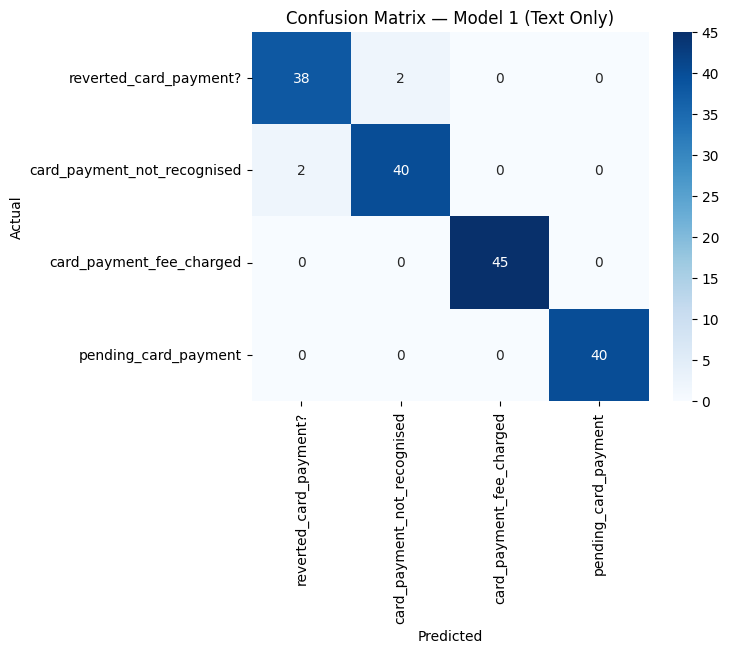

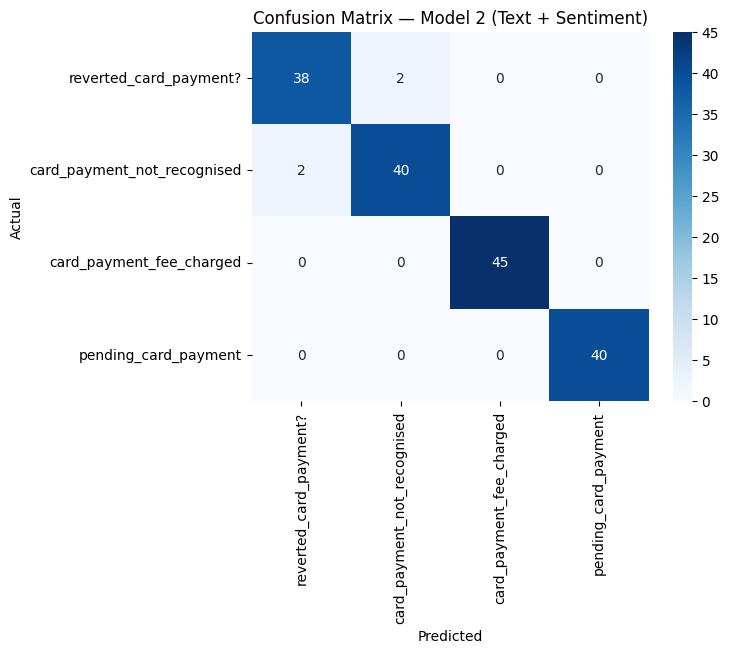

In [ ]:
# Confusion Matrix comparison
def plot_conf_matrix(true, pred, labels, title):
    cm = confusion_matrix(true, pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot Model 1 (Text only)
plot_conf_matrix(y_test, y_pred1, labels=ambiguous_intents, title="Confusion Matrix — Model 1 (Text Only)")

# Plot Model 2 (Text + Sentiment)
plot_conf_matrix(le.inverse_transform(y_test_enc), le.inverse_transform(y_pred2), labels=ambiguous_intents, title="Confusion Matrix — Model 2 (Text + Sentiment)")
